# Anharmonic Ascillator Eigen Analysis

1. Show that the operators $\hat x^2$ and $\hat x^4$ have the following matrix elements in the harmonic oscillator basis:
    \begin{align}
    \langle n|\hat x^2|m\rangle 
    &=(n+1/2)\delta_{nm} + \tfrac{1}{2}\sqrt{(n+1)(n+2)}\,\delta_{n,m-2} + 
\tfrac{1}{2}\sqrt{(n-1)n\,}\,\delta_{n,m+2} \\
    \langle n|\hat x^4|m\rangle 
    &= \tfrac{1}{4}\!\left(6n^2 + 6n + 3\right)\!\delta_{nm}
+ \sqrt{(n+1)(n+2)}\left(n+\tfrac{3}{2}\right)\!\delta_{n,m-2}\;+ \nonumber\\
& + \sqrt{(n-1)n\,}\left(n-\tfrac{1}{2}\right)\!\delta_{n,m+2} +
\tfrac{1}{4}\sqrt{(n+1)(n+2)(n+3)(n+4)}\,\delta_{n,m-4}\;+ \nonumber\\
& + \tfrac{1}{4}\sqrt{(n-3)(n-2)(n-1)n\,}\,\delta_{n,m+4}.
\end{align}
1. Solve the anharmonic oscillator eigenvalue problem written in the harmonic oscillator basis for at least the first four energy levels. Note that the function `hermval` from NumPy offers an easy solution to compute the eigenfunctions $\psi_n(x)$ from the eigenvectors of the matrix representation of the hamiltonian. 
1. Plot the first four energy 
levels $E_n(\lambda)$ versus $\lambda$ over the range 
$0 \leq \lambda \leq 1$. Plot also the spacings between the 
levels $\Delta E(\lambda) = E_{n+1}(\lambda) - E_n(\lambda)$. Make sure to use a basis 
size $N$ sufficiently larger than the desired number of lowest eigenvalues to ensure convergence of the eigensystem algorithm.
1. Check the convergence of the method with respect to the basis size $N$ by plotting one 
of the lowest (or more) energy eigenvalues $E_n(N)$ for $\lambda = 1$ versus the basis size $N$. 
Alternatively, to demonstrate the convergence more clearly, you can also plot the differences between 
two consecutive estimates $\epsilon_n = E_n(N) - E_n(N\!+\!2)$ versus $N$.
1. Plot and compare the first four eigenfunctions $\psi_n(x)$ for the harmonic oscillator with $\lambda=0$ to 
the eigenfunctions for the anharmonic oscillator with $\lambda=1$.

## 1. Derive $\hat x^2$ and $\hat x^4$ operators

Let's begin with the definitions for the ladder oprators, $\hat{a_{+}}$ and $\hat{a_{-}}$.

$$\begin{align}
\langle n | \hat{a_{+}} | m \rangle & = \langle n | \sqrt{m+1} | m+1 \rangle \\
& = \sqrt{m+1} \langle n | m+1 \rangle \\
& = \sqrt{m+1} \delta _{n, m+1} \\
\langle n | \hat{a_{-}} | m \rangle & = \langle n | \sqrt{m} | m-1 \rangle \\
& = \sqrt{m} \langle n | m-1 \rangle \\
& = \sqrt{m} \delta _{n, m-1} \\
\end{align}$$

The $\hat x$ operator is 

$$\hat x = \frac{1}{\sqrt{2}}(\hat{a_{+}} + \hat{a_{-}})$$

So calculating $\langle n | \hat{x} | m \rangle$

$$\begin{align}
\langle n | \hat{x} | m \rangle & = \frac{1}{\sqrt{2}} \langle n | \hat{a_{+}} + \hat{a_{-}}  | m \rangle \\
& = \frac{1}{\sqrt{2}} [ \langle n | \hat{a_{+}} | m \rangle + \langle n | \hat{a_{-}}  | m \rangle ] \\
& = \frac{1}{\sqrt{2}} [ \sqrt{m+1} \delta _{n, m+1} + \sqrt{m} \delta _{n, m-1} ] \\
\end{align}$$

We can then find $\langle n | \hat{x^2} | m \rangle$

$$\begin{align}
\langle n | \hat{x^2} | m \rangle & = \frac{1}{2} \langle n | ( \hat{a_{+}} + \hat{a_{-}} )^2 | m \rangle \\
& = \frac{1}{2} \langle n |  \hat{a_{+}}\hat{a_{+}} + \hat{a_{+}}\hat{a_{-}} + \hat{a_{-}}\hat{a_{+}} + \hat{a_{-}}\hat{a_{-}}| m \rangle \\
& = \frac{1}{2}[ \langle n |  \hat{a_{+}}\hat{a_{+}} | m \rangle +  \langle n |  \hat{a_{+}}\hat{a_{-}} | m \rangle +  \langle n |  \hat{a_{-}}\hat{a_{+}} | m \rangle +  \langle n |  \hat{a_{-}}\hat{a_{-}} | m \rangle ] \\
\end{align}$$

Each component can be calculated by iteratively applying operators. 

$$\begin{align}
\langle n |  \hat{a_{+}}\hat{a_{+}} | m \rangle & = \langle n |  \hat{a_{+}} \sqrt{m+1} | m+1 \rangle \\
& =  \langle n |  \sqrt{m+1}\sqrt{m+2} | m+2 \rangle \\ 
& =  \sqrt{m+1}\sqrt{m+2} \langle n | m+2 \rangle \\
& =  \sqrt{(m+1)(m+2)} \delta _{n, m+2} \\
\langle n |  \hat{a_{+}}\hat{a_{-}} | m \rangle & =  (m) \delta _{n, m} \\
\langle n |  \hat{a_{-}}\hat{a_{+}} | m \rangle & =  (m+1) \delta _{n, m} \\
\langle n |  \hat{a_{-}}\hat{a_{-}} | m \rangle & =  \sqrt{(m)(m-1)} \delta _{n, m-2} \\
\end{align}$$

Adding everything together, we see that 
$$\langle n|\hat {x^2}|m\rangle  = \frac{1}{2} [ (2m + 1)\delta_{n, m} + \sqrt{(m+1)(m+2)}\delta_{n,m+2} + \sqrt{(m)(m-1)}\delta_{n,m-2} ]$$

In a similar fashion, we can find $\langle n | \hat{x^4} | m \rangle$. The calculations are all the same, just longer. Simplifying, 

\begin{align}
\langle n | \hat{x^4} | m \rangle & = \frac{1}{2} \langle n | ( \hat{a_{+}} + \hat{a_{-}} )^4 | m \rangle \\
& = \frac{1}{2}[ \frac{1}{2}\left(6n^2 + 6n + 3\right)\delta_{n,m}
+ \left(2n+ 3\right)\sqrt{(n+1)(n+2)}\delta_{n,m-2} \\
& +\left(2n-1\right) \sqrt{(n)(n-1)}\delta_{n,m+2} +
\frac{1}{2}\sqrt{(n+1)(n+2)(n+3)(n+4)}\delta_{n,m-4} \\
& + \frac{1}{2}\sqrt{(n-3)(n-2)(n-1)n}\delta_{n,m+4} ] \\
\end{align}

In [1]:
from proj_2_module import hermitian_eigensystem
from proj_2_EigenTest import npprint, gen_rand_herm, is_hermitian, is_eigenvector, verify_eigenvectors
from proj_2_EigenAnalysis import psi, plot_eigenfunction
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

## 2. Solving the anharmonic oscillator eigenvalue problem

Let's solve the anharmonic oscillator using $\hat{H}(\lambda) = \hat{H} + \lambda \hat{x^4}$. Note that $\langle n | \hat{H} | m  \rangle = (m + \frac{1}{2})\delta _{n, m}$. So, to find $\hat{H}(\lambda)$, we can add the matrix representations of $\hat{H}$ and $\lambda \hat{x^4}$ together.

$\hat{H}$ is simple to compute, as it is simply a diagonal matrix.

Before we do anything, we must choose a dimension size. Since we can't compute infinite dimensional matricies, we must choose a dimension that balances a large size and computation time. 

Since we are interested in the first four energy levels, let's choose `dim = 20`, as this seems sufficiently large, and can be diagonalized in about 3 seconds. 

In [2]:
dim = 20

# Create a list of diagonals for H
h_diag = [m + 0.5 for m in range(1, dim + 1)]
# Create a matrix of zeros, and fill the diagonals with the diagonal elements. 
h = np.zeros((dim, dim))
np.fill_diagonal(h, h_diag)

Now lets create our matrix for $\hat{x^4}$. Although we computed the full expansion for $\hat{x^4}$, it is easier to implement, and less prone to mistakes if we compute $\hat{x^4}$ by multiplying the matrix representiaon of $\hat{x}$.

In [3]:
x = np.zeros((dim, dim))

# Iterate over every element in the matrix, and check for deltas = 1.
for n in range(dim):
    for m in range(dim):
        if n == m + 1:
            x[n, m] = sqrt(m + 1)
        elif n == m - 1:
            x[n, m] = sqrt(m)
            
x_4 = np.linalg.multi_dot([x, x, x, x])

We would like to plot the wave function for the first four energy levels. That is, the wave function given by the first four eigenvectors. 

Consider the ground state $\psi_0(x)$. From our `hermitian_eigensystem` solution, the first element in the eigenvalue vector is the energy of the ground state, $E_0(\lambda)$. The first column of the eigenvector matrix is the eigenvector that corresponds with this eigenvalue for $E_0(\lambda)$. Let $c = [c_0, c_1, \cdots,c_n]$ be this eigenvector. 

We then say that for the anharmonic oscillator, 

$$\psi_0(x)= c_0 \phi_0(x) + c_1 \phi_1(x) + \dotsc, + c_n \phi_n(x)$$ 

where 

$$\phi _n(x) = (2^n n! \sqrt{\pi})^{-1/2}e^{-x^2/2}H_n(x)$$ 

as given on page 15 of `project2-lecture notes 1.pdf`. Since we chose a matrix size of $N = 20$, our $n$ ranges from 0 to 19. So, 


$$\psi_0(x)= c_0 \phi_0(x) + c_1 \phi_1(x) + \dotsc, + c_{19} \phi_{19}(x)$$ 

We can then plot the Real part of this wave function as a function of $x$. This is the wave function solution for the first energy level. We can then repeat this process for the next three energy levels, for $\psi_0(x)$, $\psi_1(x)$, $\psi_2(x)$, and $\psi_3(x)$.

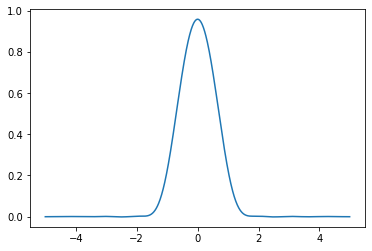

In [4]:
# Add to make H(lambda) Matrix
h_l = h + x_4

# Diagonalize Hamiltonain Matrix
w, v = hermitian_eigensystem(h_l)

# Plot Wavefunction
p = []

# Plot from -5 to 5. 
x = np.arange(-5, 5, 0.01)
for j, _ in enumerate(x):
    # Use psi function to calculate value at a given point x. 
    p.append(psi(v.T[0], x[j]))

plt.plot(x, p)
plt.show()

Great! We can now visulaize the wave function solution for the ground state of the anharmonic oscillator with $\lambda = 1$.

From here on out, let's use numpy's hermitian matrix solver. In EigenTest, we proved that our method `hermitian_eigensystem` and `np.linalg.eigh` produce the same results. Since we will be diagonalizing lots of large matricies, I will use the numpy method to save on computation time. 

We have successfully plotted the ground state wave function. Now let's plot the wave function for the other energy levels. 

Note that I will use `plot_eigenfunction` to reduce repeated code. 

Here is a plot of $\psi_1$ for $E_1$.

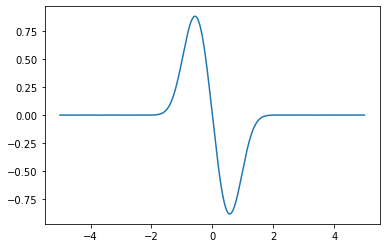

In [5]:
plot_eigenfunction(l = 1, energy_level = 1)

Here is a plot of $\psi_2$ for $E_2$.

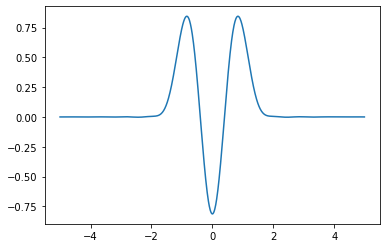

In [6]:
plot_eigenfunction(l = 1, energy_level = 2)

Here is a plot of $\psi_3$ for $E_3$.

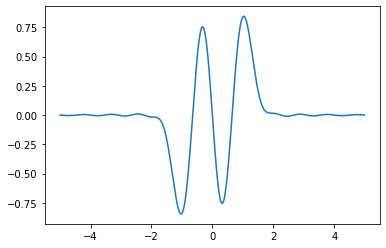

In [7]:
plot_eigenfunction(l = 1, energy_level = 3)

## 3. Plot the first four energy levels $E_n(\lambda)$

Now to find the first four energy levels, $E_n(\lambda)$, we simply have to diagonalize $\hat{H}(\lambda) = \hat{H} + \lambda \hat{x^4}$ and take the first four eigenvalues. Let's iterate $\lambda$ from $0$ to $1$ in steps of $0.01$.

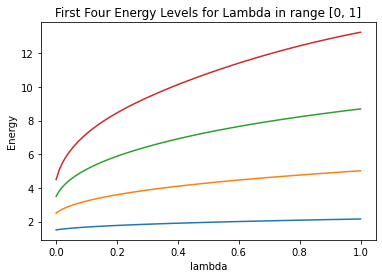

In [8]:
lambdas = [i/100 for i in range(101)]
energy = [[] for _ in range(4)]

for l in lambdas:
    h_l = h + l * x_4
    w, v = np.linalg.eigh(h_l)
    for n in range(4):
        energy[n].append(w[n])

plt.plot(lambdas, energy[0])
plt.plot(lambdas, energy[1])
plt.plot(lambdas, energy[2])
plt.plot(lambdas, energy[3])
plt.xlabel('lambda')
plt.ylabel('Energy')
plt.title('First Four Energy Levels for Lambda in range [0, 1]')
plt.show()

Above, we see the plot of the first four energy levels $E_n(\lambda)$ vs $\lambda$ over the range $0 \leq \lambda \leq 1$.

$E_0(\lambda)$ is blue. 

$E_1(\lambda)$ is orange. 

$E_2(\lambda)$ is green. 

$E_3(\lambda)$ is red. 

From this plot, we can draw a few conclusions. We see $E_0(\lambda)$ has the lowest energy level, which makes sense as it is the ground state. 

We also see that as $\lambda$ increases, the energy $E_n(\lambda)$ also increases. This suggests that as we increase the pertubation $\lambda$, the energy levels increase. 

Let's also plot the spacings between the levels $\Delta E(\lambda) = E_{n+1}(\lambda) - E_n(\lambda)$ as a function of $\lambda$. 

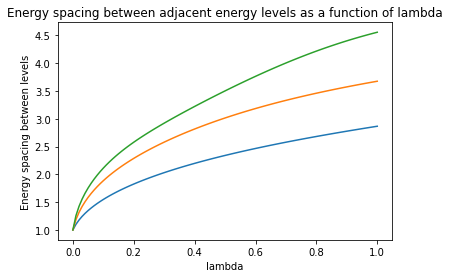

In [9]:
# Instead of using loops to zip through the lists of energies, it might just be easier to convert these to numpy arrays. 

energy = np.array(energy)

del_e_01 = energy[1] - energy[0]
del_e_12 = energy[2] - energy[1]
del_e_23 = energy[3] - energy[2]

plt.plot(lambdas, del_e_01)
plt.plot(lambdas, del_e_12)
plt.plot(lambdas, del_e_23)
plt.xlabel('lambda')
plt.ylabel('Energy spacing between levels')
plt.title('Energy spacing between adjacent energy levels as a function of lambda')
plt.show()

From this, we see that when $\lambda = 0$, the energy spacing between levels is a constant of $1$. This makes sense, as this is what we would expect from a simple harmonic oscillator. 

As $\lambda$ starts to increase, the spacing between energy levels starts to increase. This suggests that as we increase the pertubation, the energy levels increase and move further apart. 

## 4. Convergence as $N \rightarrow \infty $

Previously, we were working under the assumption that as we increased the size of our Hamiltonain matrix, we would get closer and closer to the true solution. Since the true solution requires a matrix of size infinity, we make an approximation by choosing a size $N < \infty $.

If this is true, then we should see that as $N$ increases, the eigenvalue solutions will converge on their true value. 

To show this, we can plot the first four energy levels $E_n(\lambda)$ as a function of $N$, where $N$ is the size of the Hamiltonian matrix. We should see these eigenvalues converge and settle on a value as $N$ increases. Let's choose $\lambda = 1$ and range $N$ from $2$ to $30$. 

In [10]:
def create_h_l(dim, l = 1):
    if dim < 2:
        raise Exception("dim must be >= 2")
    # Create a list of diagonals for H
    h_diag = [m + 0.5 for m in range(1, dim + 1)]
    # Create a matrix of zeros, and fill the diagonals with the diagonal elements. 
    h = np.zeros((dim, dim))
    np.fill_diagonal(h, h_diag)

    x = np.zeros((dim, dim))
    # Iterate over every element in the matrix, and check for deltas = 1.
    for n in range(dim):
        for m in range(dim):
            if n == m + 1:
                x[n, m] = sqrt(m + 1)
            elif n == m - 1:
                x[n, m] = sqrt(m)

    x_4 = np.linalg.multi_dot([x, x, x, x])
    
    return h + l * x_4

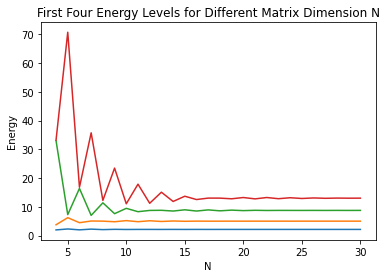

In [11]:
n = list(range(4, 31))
h_l = [create_h_l(dim, 1) for dim in n]
energy = [[] for _ in range(4)]

for i in range(len(h_l)):
    w, v = np.linalg.eigh(h_l[i])
    for j in range(4):
        energy[j].append(w[j])
        
plt.plot(n, energy[0])
plt.plot(n, energy[1])
plt.plot(n, energy[2])
plt.plot(n, energy[3])
plt.xlabel('N')
plt.ylabel('Energy')
plt.title('First Four Energy Levels for Different Matrix Dimension N')
plt.show()

As we can see in the plot above, when $N$ is low, the energy eigenvalues bounce around, but slowly start to converge as $N$ increases. 

$E_0$ is blue. 

$E_1$ is orange. 

$E_2$ is green. 

$E_3$ is red. 

It appears that larger energy levels require a larger matrix to converge. This makes sense.

We can now confirm that as $N$ incrases, the energy eigenvalues do converge. 

## 5. Plot and compare $\psi_n(x)$ for $\lambda = 0$ and $\lambda = 1$

Now we would like to compare our normal harmonic oscillator to our anharmonic oscillator by seeing how $\lambda$ affects the wave function. 

Let's plot the wave function for $\lambda = 0$ and $\lambda = 1$ using the `plot_eigenfunction` method as before, for the first four energy levels. 

Here is a plot comparing $\lambda = 0$ and $\lambda = 1$ for $E_0$. Blue is $\lambda = 0$ and orange is $\lambda = 1$.

Interestingly, the wave function flips signs. But given that we are actually interested in the wave function squared, we see that the difference is that the wave function is more centered. So making an anharmonic oscillator with an $\hat{x^4}$ term will cause the wave function to become sharper at its peaks. 

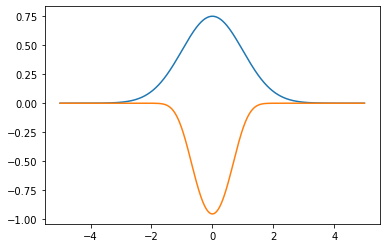

In [13]:
plot_eigenfunction(l = [0, 1], energy_level = [0, 0])

Here is a plot comparing $\lambda = 0$ and $\lambda = 1$ for $E_1$. Blue is $\lambda = 0$ and orange is $\lambda = 1$.

As we see from before, we see that our $\lambda = 1$ case has the same number of peaks as the $\lambda = 0$ case, but they are sharper and closer to the center. 

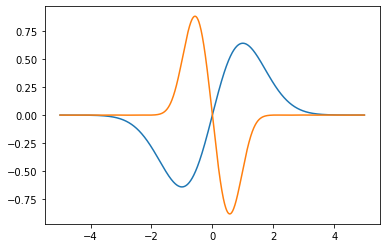

In [14]:
plot_eigenfunction(l = [0, 1], energy_level = [1, 1])

Here is a plot comparing $\lambda = 0$ and $\lambda = 1$ for $E_2$. Blue is $\lambda = 0$ and orange is $\lambda = 1$.

It also appears that this plot shows the trend that the $\lambda = 1$ case has the same number of peaks as the $\lambda = 0$ case, but they are sharper and closer to the center. 

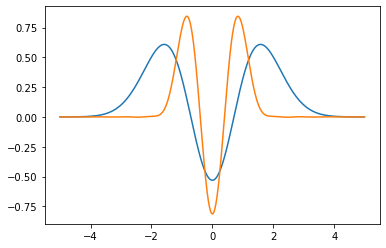

In [15]:
plot_eigenfunction(l = [0, 1], energy_level = [2, 2])

Here is a plot comparing $\lambda = 0$ and $\lambda = 1$ for $E_3$. Blue is $\lambda = 0$ and orange is $\lambda = 1$.

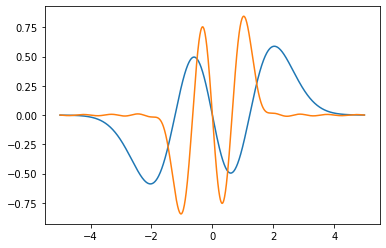

In [16]:
plot_eigenfunction(l = [0, 1], energy_level = [3, 3])